In [89]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import color_sequences as cs
import glob

YEAR = 2023

In [90]:
paths = glob.glob(f'data\\{YEAR}\\*.csv')
data = pd.concat((pd.read_csv(f) for f in paths), ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1118 non-null   object 
 1   Authors                 1036 non-null   object 
 2   Author Affiliations     1036 non-null   object 
 3   Publication Title       1118 non-null   object 
 4   Date Added To Xplore    1118 non-null   object 
 5   Publication Year        1118 non-null   int64  
 6   Volume                  1118 non-null   int64  
 7   Issue                   1118 non-null   int64  
 8   Start Page              1118 non-null   object 
 9   End Page                1118 non-null   object 
 10  Abstract                1062 non-null   object 
 11  ISSN                    1118 non-null   object 
 12  ISBNs                   0 non-null      float64
 13  DOI                     1118 non-null   object 
 14  Funding Information     903 non-null    

In [91]:
data.dropna(how='all', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Document Title          1118 non-null   object 
 1   Authors                 1036 non-null   object 
 2   Author Affiliations     1036 non-null   object 
 3   Publication Title       1118 non-null   object 
 4   Date Added To Xplore    1118 non-null   object 
 5   Publication Year        1118 non-null   int64  
 6   Volume                  1118 non-null   int64  
 7   Issue                   1118 non-null   int64  
 8   Start Page              1118 non-null   object 
 9   End Page                1118 non-null   object 
 10  Abstract                1062 non-null   object 
 11  ISSN                    1118 non-null   object 
 12  DOI                     1118 non-null   object 
 13  Funding Information     903 non-null    object 
 14  PDF Link                1118 non-null   

In [92]:
data = data[['Authors', 'Author Affiliations', 'Publication Year', 'Funding Information', 'Author Keywords', 'IEEE Terms']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118 entries, 0 to 1117
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              1036 non-null   object
 1   Author Affiliations  1036 non-null   object
 2   Publication Year     1118 non-null   int64 
 3   Funding Information  903 non-null    object
 4   Author Keywords      1029 non-null   object
 5   IEEE Terms           1052 non-null   object
dtypes: int64(1), object(5)
memory usage: 52.5+ KB


In [93]:
data.dropna(subset=['Authors', 'Author Affiliations'], inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Authors              1036 non-null   object
 1   Author Affiliations  1036 non-null   object
 2   Publication Year     1036 non-null   int64 
 3   Funding Information  903 non-null    object
 4   Author Keywords      1029 non-null   object
 5   IEEE Terms           1034 non-null   object
dtypes: int64(1), object(5)
memory usage: 48.7+ KB


In [94]:
data.to_csv(f'data\\{YEAR}\\aggregate\\combined.csv', encoding='utf-8', index=False)
data.head(5)

,Authors,Author Affiliations,Publication Year,Funding Information,Author Keywords,IEEE Terms
0,K. S. Nikita,"School of Electrical and Computer Engineering,...",2023,NaN,NaN,NaN
1,E. Calà; M. Baldelli; A. Catalani; E. Menargue...,"Airbus Italia S.p.A., Rome, Italy; Airbus Ital...",2023,European Space Agency (ESA) under the ARTES AT...,Additive manufacturing (AM);array fed reflecto...,Antenna arrays;Reflector antennas;Satellite an...
2,P. Wu; K. Liu; Z. Yu,"Chinese Academy of Sciences (CAS), Aerospace I...",2023,Foundations of Chinese Academy of Sciences(gra...,Antenna array;feeding network;high gain;higher...,Antenna arrays;Gain;Slot antennas;Antennas;Ant...
3,H. Nakano; T. Abe; J. Yamauchi,"Department of Science and Engineering, Hosei U...",2023,Japan Society for the Promotion of Science (JS...,Circularly polarized (CP) broadside beam;large...,Antennas;Directive antennas;Helical antennas;A...
4,J. Cavillot; M. Bodehou; C. Craeye,"École Polytechnique de Louvain, Université Cat...",2023,Fonds pour la Formation à la Recherche dans l’...,Broken rooftop;fast Fourier transforms (FFT);i...,Probes;Impedance;Optimization;Antenna feeds;Su...


In [95]:
countries = []

# with open('auth_aff.txt', 'w', encoding='utf-8') as f:
largest = [0, 0]
for i in range(data.shape[0]):
    authors = data ['Authors'][i].split('; ')
    affiliations = data['Author Affiliations'][i].split('; ')
    largest = [max([largest[0], len(authors)]), i if largest[0] < len(authors) else largest[1]]
    for author, aff in zip(authors, affiliations, strict=True):
        # f.write(f'{author}: {aff}\n')
        if aff == 'NA':
            print(author)
        countries.append(aff.split(', ')[-1])

F. M. Tesche
A. Georgiadis


In [96]:
countries = pd.Series(countries, dtype=str)
countries = countries.replace("Republic of Korea", "South Korea")
countries = countries.replace("Korea", "South Korea")
countries = countries.replace("United Arab Emirates", "UAE")
countries = countries.replace("Türkiye", "Turkey")
countries = countries.replace("Türkey", "Turkey")
countries = countries.replace("Hong Kong SAR", "Hong Kong")
countries = countries.replace("Netherlands", "The Netherlands")
countries = countries.replace("SAR", "SAR China")
countries = countries.replace("U.K", "U.K.")
countries = countries.replace("China,", "China")
countries = countries.replace("P. R. China", "China")
print(countries.info())
countries = countries[countries != 'NA']
print(countries.info())
counts = countries.value_counts()
# counts = counts[counts >= 10]
print(counts)
labels = list(counts.keys())
values = list(counts.values)

<class 'pandas.core.series.Series'>
RangeIndex: 4663 entries, 0 to 4662
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4663 non-null   object
dtypes: object(1)
memory usage: 36.6+ KB
None
<class 'pandas.core.series.Series'>
Index: 4661 entries, 0 to 4662
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4661 non-null   object
dtypes: object(1)
memory usage: 72.8+ KB
None
China              2730
USA                 272
Italy               211
South Korea         123
U.K.                107
Spain               101
France               89
Canada               82
Australia            79
Sweden               75
Japan                70
India                70
Germany              62
The Netherlands      57
Singapore            53
Denmark              51
Finland              46
Iran                 45
Hong Kong            33
Turkey               30
Greece               24
Saudi Arabia         24
Belgium              23
Portugal             18
Czech Republic     

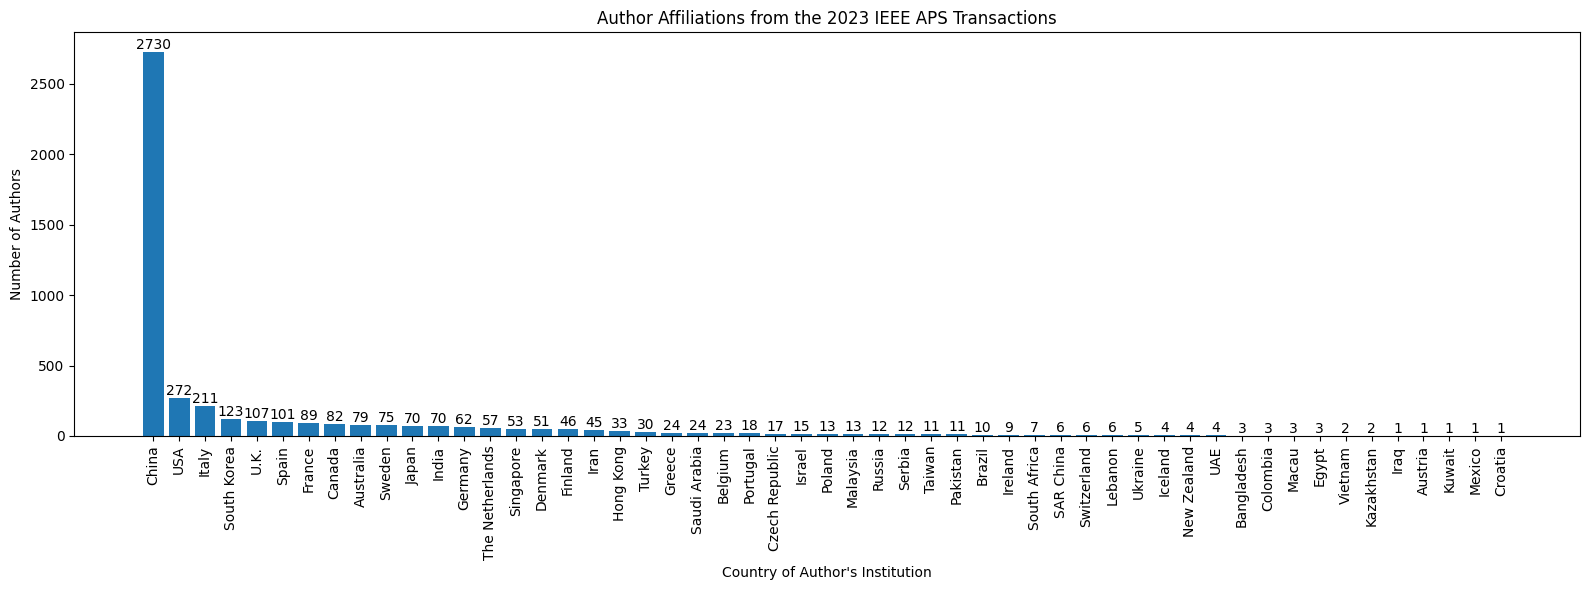

In [97]:
fig, ax = plt.subplots(figsize=(16, 6))
bar_cont = ax.bar(labels, values)
# ax.set(ylim=(0, 1999))
plt.xlabel('Country of Author\'s Institution')
plt.ylabel('Number of Authors')
plt.title(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.xticks(rotation=90)
ax.bar_label(bar_cont)
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()

In [98]:
super_counts = counts[counts >= 75]
full = counts.sum()
filtered = super_counts.sum()

super_counts['All Other Countries'] = full - filtered

labels = list(super_counts.keys())
values = list(super_counts.values)


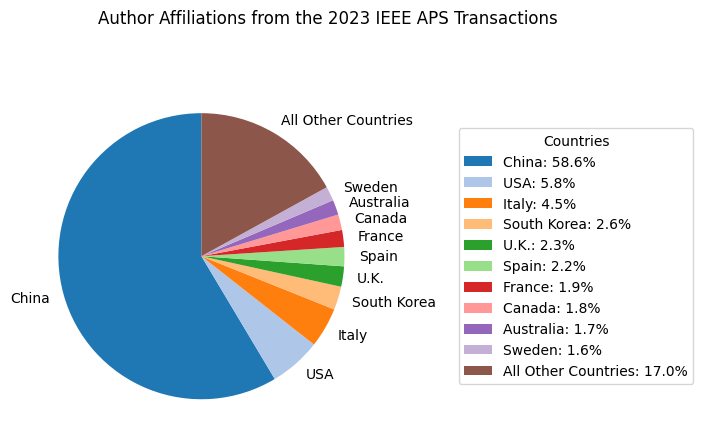

In [99]:

fig, ax = plt.subplots()
wedges, texts = ax.pie(values, labels=labels, startangle=90, colors=cs['tab20'])
percent = [f'{label}: {value/sum(values) * 100:.1f}%' for label, value in zip(labels, values, strict=True)]
ax.legend(wedges, percent, title='Countries', loc='center left', bbox_to_anchor=(1.2, 0, 0.5, 1))
fig.suptitle(f'Author Affiliations from the {YEAR} IEEE APS Transactions')
plt.tight_layout()
plt.savefig(f'figures\\{YEAR}\\{YEAR}_authors_PIE.png', bbox_inches='tight')
plt.show()